https://mkmanu.wordpress.com/2014/08/05/sentiment-analysis-on-twitter-data-text-analytics-tutorial/comment-page-1/

https://mkmanu.wordpress.com/2014/08/05/sentiment-analysis-on-twitter-data-text-analytics-tutorial/comment-page-1/

## Practicing R Text analysis on BJP Tweets

In [1]:
#install.packages("twitteR")

In [2]:
#install.packages("RColorBrewer")

In [3]:
# install.packages("Rstem_0.4-1.tar.gz" , repos=NULL, type="source")

In [4]:
#install.packages("sentiment_0.2.tar.gz")

In [5]:
library(tm)
library(Rstem)
library(twitteR)
library(plyr)
library(ggplot2)
library(wordcloud)
library(RColorBrewer)
library(sentiment)

Loading required package: NLP

Attaching package: ‘plyr’

The following object is masked from ‘package:twitteR’:

    id


Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate

Loading required package: RColorBrewer


Twitter registering values

In [6]:
api_key <- "ey7JgXKpFrNusz2uCXuTO7wai"
api_secret <- "sfKmxBn2GYjlwiR0UG2pSZJwQFjpfzcv8k0T8aGStlq6NYye8H"
access_token <- "229025578-yQmMERv5YbeA6lM3mq8HXX00cKK9grEu7pxfCa1A"
access_token_secret <- "7lY6mT12k3DUIMnuHEGGVawHsYpFX39ReEQZezUVbtQFa"

setup_twitter_oauth(api_key, api_secret, access_token, access_token_secret)

[1] "Using direct authentication"


In [7]:
ipl_tweets <- searchTwitter("IPL2017", n=500, lang="en")

In [8]:
head(ipl_tweets)

[[1]]
[1] "GeoSuper009: 0N MY ID\n#IPL2017\n#PAKvWI\n#PAKCuP\n100%\n0v_BY_0v\nSuB_SaY\nTeZ_UpDt\n+\nFOLLOW\n@T20I_IPL\nSend 40404\n+\n#PAKvWI Matches\nFollow\n@Live_PakTeam"

[[2]]
[1] "pranav9983: RT @rockyandmayur: Great things happening at #IndiasBestRestaurants with Concu, Hyderabad and at #IPL2017 with #SRHvsDD tonight https://t.c…"

[[3]]
[1] "rally__pally: @Vivo_India #PerfectVIVOIPL #VIVOIPL from d womb to d tomb. @mipaltan  all the way. #CricketMeriJaan  #IPL2017 https://t.co/FX74LkR10M"

[[4]]
[1] "rockyandmayur: Great things happening at #IndiasBestRestaurants with Concu, Hyderabad and at #IPL2017 with #SRHvsDD tonight https://t.co/eq947yKJTh"

[[5]]
[1] "Nettv4uTamil: IPL - 2017 |Gayle Creates History | Gujarat Lions Vs RCB\nhttps://t.co/BRYJVvnaX7\n@IPL \n#ipl2017 #punjabvsbangalore #gayle #nettv4u"

[[6]]
[1] "IndianIPLScore: Trent Boult has conceded the most no. of fours in this year's IPL. #IPL2017 #KKR #SRH https://t.co/hn9vYAUOry"


#### fetch text of these tweets

In [9]:
ipl_text <- sapply(ipl_tweets, function(x) x$getText())

In [10]:
#head(ipl_text)

In [11]:
#Removing retweet entities
ipl_text <- gsub("(RT|via)((?:\\b\\W*@\\w+)+)","",ipl_text)

In [12]:
#head(ipl_text)

Removing mentions [ @ ]

In [13]:
library(stringr)
ipl_text1 <- str_replace_all(ipl_text, "@\\w+", "")

In [14]:
#head(ipl_text1)

Removing punctutation

In [15]:
ipl_text2 <- Corpus(VectorSource(ipl_text1))

In [16]:
ipl_text3 <- tm_map(ipl_text2, removeNumbers)

In [17]:
ipl_text4 <- tm_map(ipl_text3, content_transformer(tolower))

In [18]:
#removing stop words and bjp. IPL is present in all tweets, and hence if we keep it, all 
#other terms will seems smaller in frequency
ipl_text5 <- tm_map(ipl_text4, removeWords, c(stopwords("english"),"ipl"))

In [19]:
ipl_text6 <- tm_map(ipl_text5, removePunctuation)

In [20]:
ipl_text7 <- tm_map(ipl_text6, stripWhitespace)

In [21]:
ipl_text8 <- tm_map(ipl_text7, stemDocument)

In [22]:
ipl_text8[[75]][1]

$content
[1] "kieronpollard give sanjaymanjrekar controversi silent treatment httpstcoijcfrk middaysport"

In [23]:
ipl_dtm <- TermDocumentMatrix(ipl_text8)

In [24]:
ipl_m <- as.matrix(ipl_dtm)

In [25]:
ipl_m_v <- sort(rowSums(ipl_m), decreasing = T)

In [26]:
ipl_d <- data.frame(word = names(ipl_m_v), freq = ipl_m_v)

In [27]:
head(ipl_d,10)

,word,freq
team,team,101
match,match,91
win,win,87
amp,amp,85
will,will,76
rcb,rcb,75
run,run,60
srhvdd,srhvdd,57
cricket,cricket,54
today,today,49


### Generate a word cloud

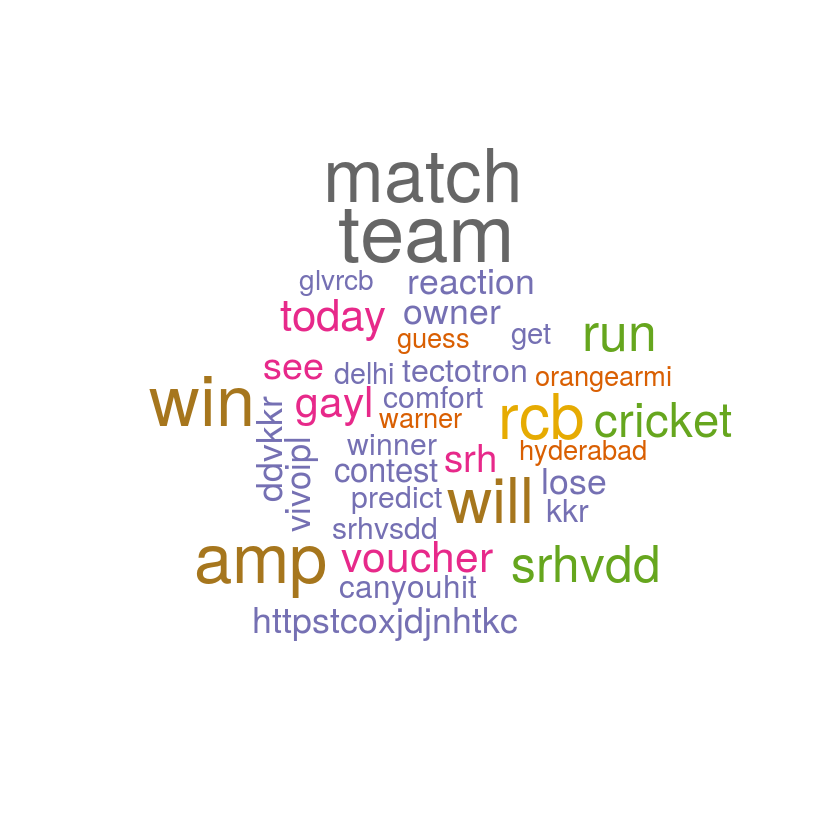

In [28]:
wordcloud(words = ipl_d$word, freq = ipl_d$freq, max.words = 100, min.freq = 25, 
         colors = brewer.pal(8, "Dark2"))

In [29]:
findAssocs(ipl_dtm, terms = "win", corlimit = 0.3)

$win
      amp      will     worth   voucher    winner     craze   favorit      tell 
     0.49      0.49      0.46      0.45      0.44      0.43      0.43      0.43 
  predict      davi      show canyouhit tectotron     guess   contest   srhvsdd 
     0.42      0.42      0.40      0.36      0.35      0.35      0.34      0.31 
    today 
     0.31

In [30]:
findAssocs(ipl_dtm, terms = "cricket", corlimit = 0.3)

$cricket
  voucher     worth   contest canyouhit tectotron    winner   predict   batsman 
     0.65      0.62      0.61      0.58      0.57      0.52      0.52      0.32

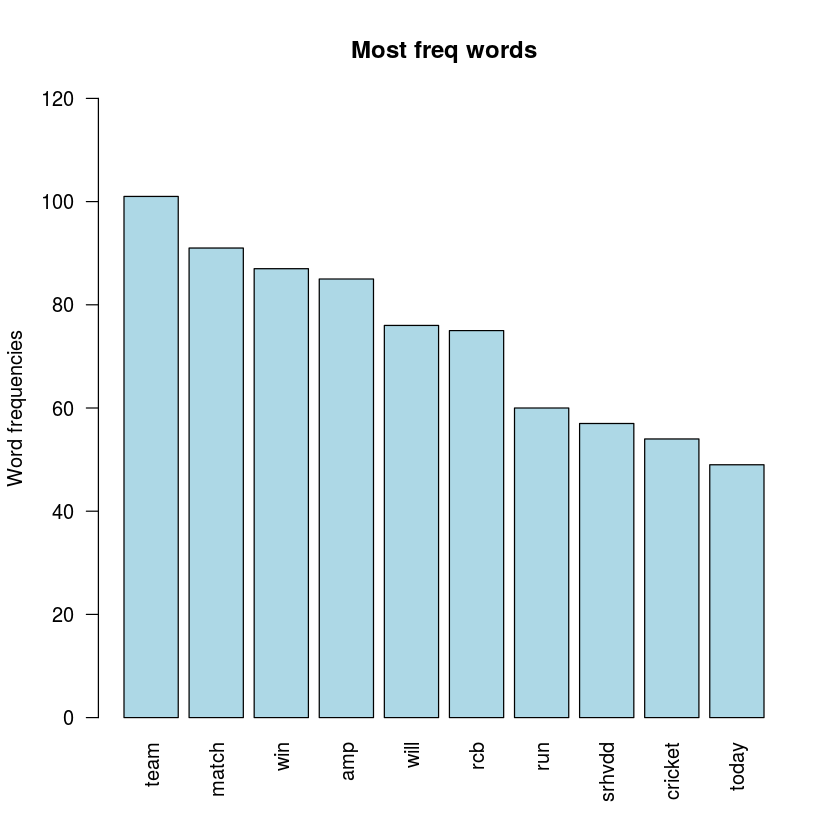

In [31]:
barplot(ipl_d[1:10,]$freq, las =2, names.arg = ipl_d[1:10,]$word, col = "lightblue", 
        main = "Most freq words", ylab = "Word frequencies", ylim = c(0,120))

### Perform Sentiment Analysis on the tweets

In [32]:
ipl_txt <- sapply(ipl_tweets, function(x) x$getText())

In [33]:
ipl_txt <- gsub("(RT|via)((?:\\b\\W*@\\w+)+)", "", ipl_txt)

In [34]:
ipl_txt <- gsub("@\\w+", "", ipl_txt)

In [35]:
ipl_txt <- gsub("[[:punct:]]", "", ipl_txt)

In [36]:
ipl_txt <- gsub("[[:digit:]]", "", ipl_txt)

In [37]:
ipl_txt <- gsub("http\\w+", "", ipl_txt)

In [38]:
ipl_txt <- gsub("[ \t]{2,}", "", ipl_txt)

In [39]:
ipl_txt <- gsub("^\\s+|\\s+$", "", ipl_txt)

In [41]:
catch.error = function(x)
{
# let us create a missing value for test purpose
y = NA
# try to catch that error (NA) we just created
catch_error = tryCatch(tolower(x), error=function(e) e)
# if not an error
if (!inherits(catch_error, "error"))
y = tolower(x)
# check result if error exists, otherwise the function works fine.
return(y)
}

In [42]:
ipl_txt = sapply(ipl_txt, catch.error)

In [43]:
ipl_txt = ipl_txt[!is.na(ipl_txt)]

In [44]:
names(ipl_txt) = NULL

### Performing Sentiment Analysis

In [45]:
ipl_txt5 <- ipl_txt[1:5]

In [46]:
head(ipl_txt5,2)

[1] "n my id\nipl\npakvwi\npakcup\n\nvbyv\nsubsay\ntezupdt\n\nfollow\n\nsend \n\npakvwi matches\nfollow"  
[2] "great things happening at indiasbestrestaurants with concu hyderabad and at ipl with srhvsdd tonight"

In [87]:
ipl_class_emo <- classify_emotion(ipl_txt, algorithm = "bayes", prior=1.0)

In [88]:
head(ipl_class_emo)

ANGER,DISGUST,FEAR,JOY,SADNESS,SURPRISE,BEST_FIT
1.46871776464786,3.09234031207392,2.06783599555953,1.02547755260094,1.7277074477352,2.78695866252273,NA
1.46871776464786,3.09234031207392,2.06783599555953,7.34083555412328,1.7277074477352,2.78695866252273,joy
1.46871776464786,3.09234031207392,2.06783599555953,1.02547755260094,1.7277074477352,2.78695866252273,NA
1.46871776464786,3.09234031207392,2.06783599555953,7.34083555412328,1.7277074477352,2.78695866252273,joy
1.46871776464786,3.09234031207392,2.06783599555953,1.02547755260094,1.7277074477352,2.78695866252273,NA
1.46871776464786,3.09234031207392,2.06783599555953,1.02547755260094,1.7277074477352,2.78695866252273,NA


In [66]:
?classify_emotion

In [89]:
emotion <- ipl_class_emo[,7]

In [90]:
emotion[is.na(emotion)] = "unknown"

In [91]:
ipl_class_emo1 <- classify_emotion(ipl_txt, algorithm = "voter")

In [92]:
head(ipl_class_emo1)

ANGER,DISGUST,FEAR,JOY,SADNESS,SURPRISE,BEST_FIT
1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,anger
1e-06,1e-06,1e-06,1.000001,1e-06,1e-06,joy
1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,anger
1e-06,1e-06,1e-06,1.000001,1e-06,1e-06,joy
1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,anger
1e-06,1e-06,1e-06,1e-06,1e-06,1e-06,anger


In [93]:
emotion_v <- ipl_class_emo1[,7]

In [94]:
emotion_v[is.na(emotion_v)] = "unknown"

In [95]:
#Classify Polarity
ipl_class_pol <- classify_polarity(ipl_txt, algorithm = "bayes")

In [96]:
head(ipl_class_pol)

POS,NEG,POS/NEG,BEST_FIT
1.03127774142571,0.445453222112551,2.31512017476245,positive
17.9196623384892,0.445453222112551,40.2279329207804,positive
1.03127774142571,9.47547003995745,0.108836578774127,negative
17.9196623384892,0.445453222112551,40.2279329207804,positive
1.03127774142571,0.445453222112551,2.31512017476245,positive
1.03127774142571,0.445453222112551,2.31512017476245,positive


In [97]:
polarity <- ipl_class_pol[,4]

In [98]:
ipl_class_pol_v <- classify_polarity(ipl_txt, algorithm = "voter")

In [99]:
head(ipl_class_pol_v)

POS,NEG,POS/NEG,BEST_FIT
1e-06,1e-06,1,neutral
1.000001,1e-06,1000001,positive
1e-06,0.500001,1.999996000008e-06,negative
1.000001,1e-06,1000001,positive
1e-06,1e-06,1,neutral
1e-06,1e-06,1,neutral


In [100]:
polarity_v <- ipl_class_pol_v[,4]

In [106]:
sent_df_b <- data.frame(text = ipl_txt, emotion = emotion, polarity = polarity,
                       stringsAsFactors = FALSE)

In [107]:
sent_df_b <- within(sent_df_b, emotion <- factor(emotion, 
                                                 levels = names(sort(table(emotion),
                                                decreasing = TRUE))))

In [108]:
head(sent_df_b)

text,emotion,polarity
n my id ipl pakvwi pakcup vbyv subsay tezupdt follow send pakvwi matches follow,unknown,positive
great things happening at indiasbestrestaurants with concu hyderabad and at ipl with srhvsdd tonight,joy,positive
perfectvivoipl vivoipl from d womb to d tomball the way cricketmerijaanipl,unknown,negative
great things happening at indiasbestrestaurants with concu hyderabad and at ipl with srhvsdd tonight,joy,positive
iplgayle creates historygujarat lions vs rcb ipl punjabvsbangalore gayle nettvu,unknown,positive
trent boult has conceded the most no of fours in this years ipl ipl kkr srh,unknown,positive


In [109]:
sent__df_v <- data.frame(text = ipl_txt, emotion = emotion_v, polarity = polarity_v,
                       stringsAsFactors = FALSE)

In [110]:
sent_df_v <- within(sent__df_v, emotion <- factor(emotion, 
                                                 levels = names(sort(table(emotion),
                                                decreasing = TRUE))))

In [111]:
head(sent_df_v)

text,emotion,polarity
n my id ipl pakvwi pakcup vbyv subsay tezupdt follow send pakvwi matches follow,anger,neutral
great things happening at indiasbestrestaurants with concu hyderabad and at ipl with srhvsdd tonight,joy,positive
perfectvivoipl vivoipl from d womb to d tomball the way cricketmerijaanipl,anger,negative
great things happening at indiasbestrestaurants with concu hyderabad and at ipl with srhvsdd tonight,joy,positive
iplgayle creates historygujarat lions vs rcb ipl punjabvsbangalore gayle nettvu,anger,neutral
trent boult has conceded the most no of fours in this years ipl ipl kkr srh,anger,neutral


#### Plotting the data

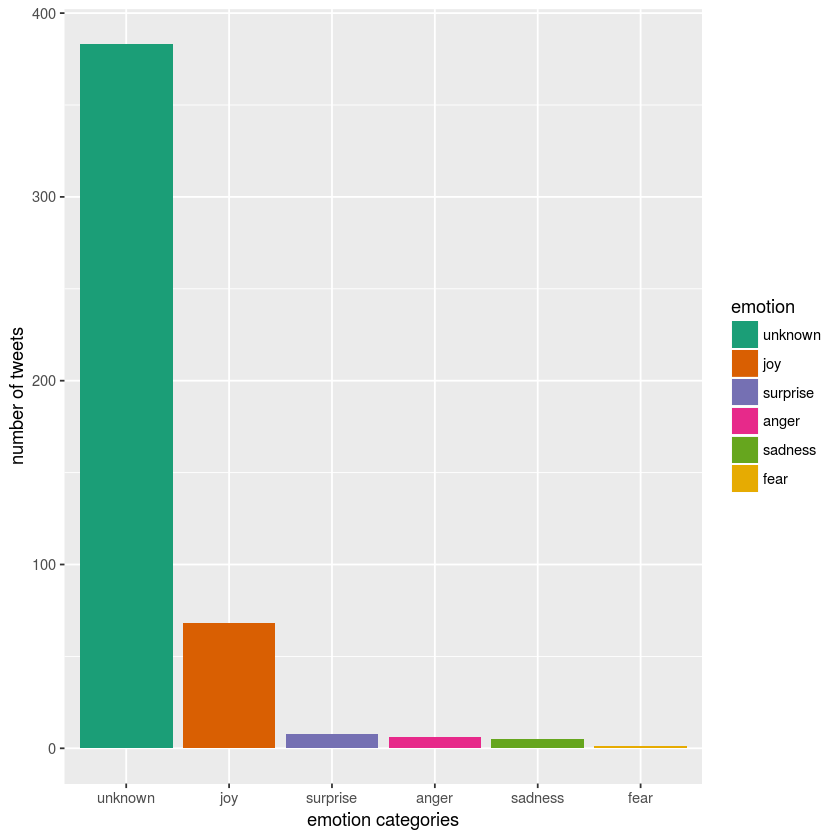

In [115]:
ggplot(sent_df_b, aes(x=emotion)) + 
geom_bar(aes(y=..count.., fill=emotion)) + 
scale_fill_brewer(palette = "Dark2") +
labs(x="emotion categories", y="number of tweets") 


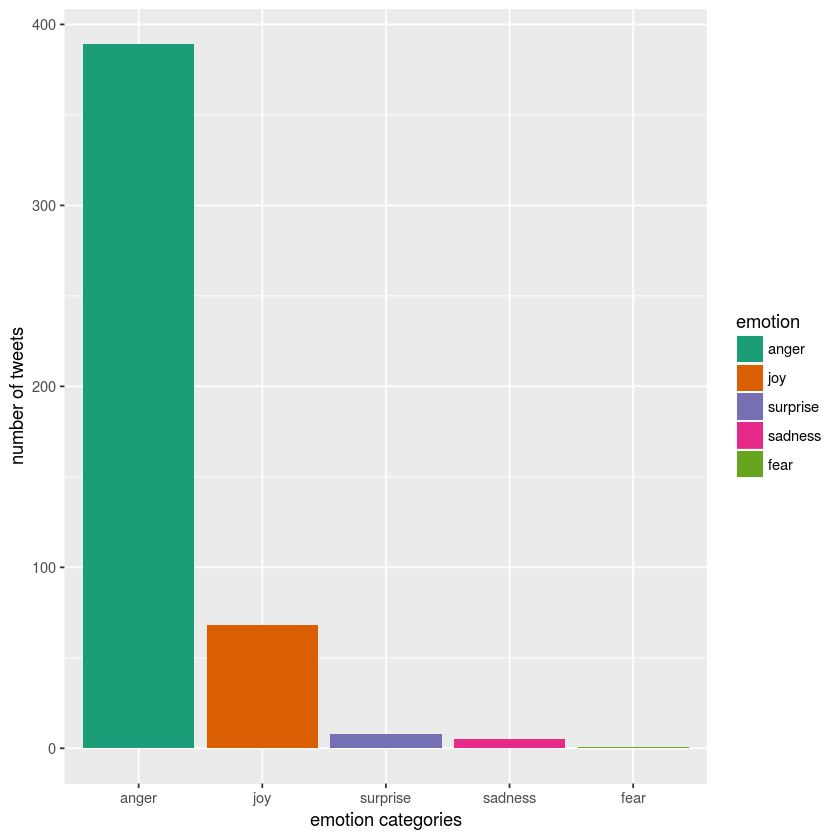

In [116]:
ggplot(sent_df_v, aes(x=emotion)) + 
geom_bar(aes(y=..count.., fill=emotion)) + 
scale_fill_brewer(palette = "Dark2") +
labs(x="emotion categories", y="number of tweets") 


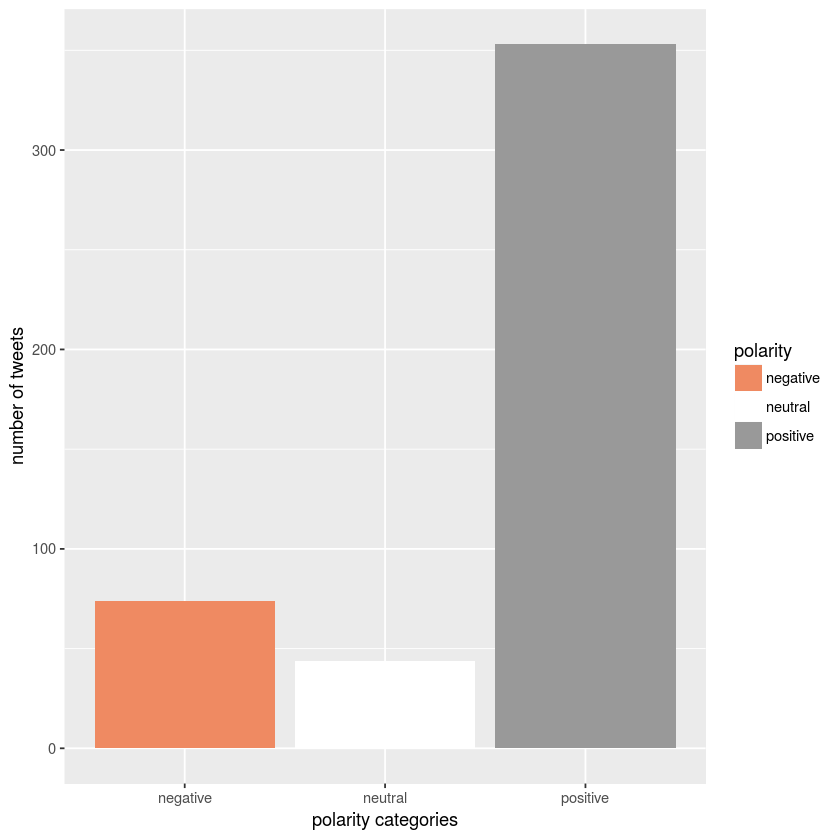

In [118]:
ggplot(sent_df_b, aes(x=polarity)) +
geom_bar(aes(y=..count.., fill=polarity)) +
scale_fill_brewer(palette="RdGy") +
labs(x="polarity categories", y="number of tweets") 

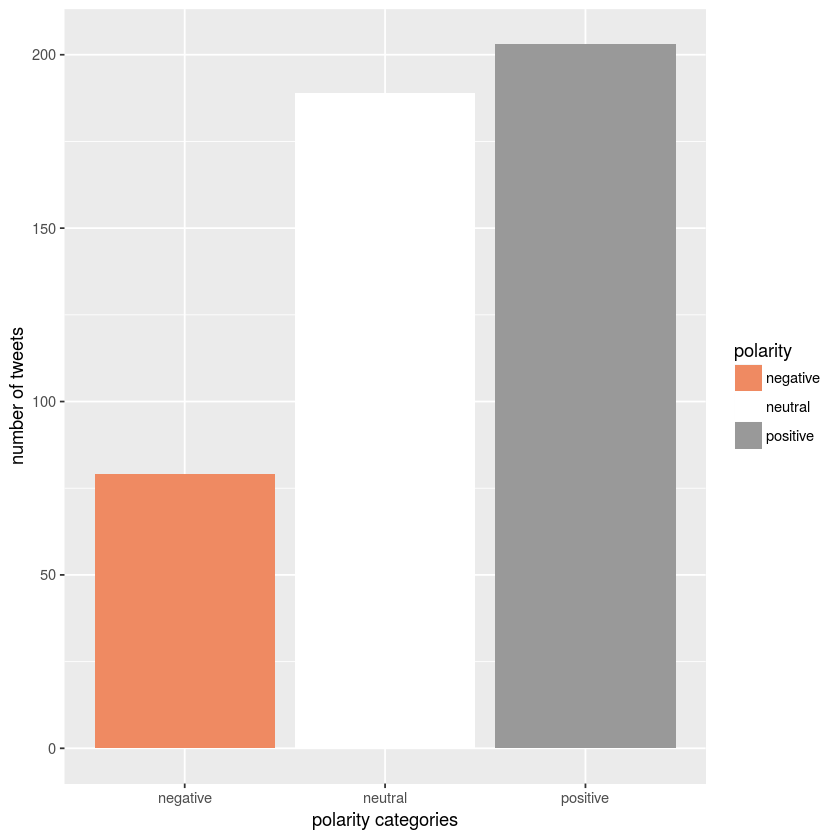

In [119]:
ggplot(sent_df_v, aes(x=polarity)) +
geom_bar(aes(y=..count.., fill=polarity)) +
scale_fill_brewer(palette="RdGy") +
labs(x="polarity categories", y="number of tweets") 

#### Seperate text by emotions and visualize words in a comparision cloud

Warning message in comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“davidwarner could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“zaheerkhan could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“vivoipl could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“today could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“iplsrhvsdd could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“participants could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm, colors = brewer.pal(nemo, "Dark2"), scal

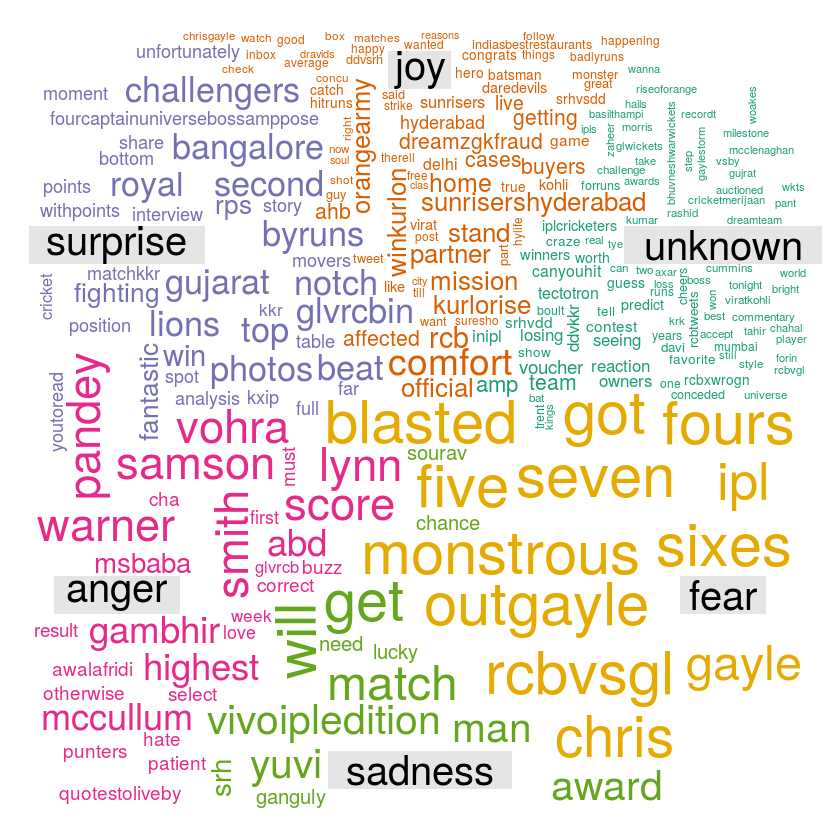

In [121]:
emos <- levels(factor(sent_df_b$emotion))
nemo <- length(emos)
emo.docs <- rep("",nemo)
for (i in 1:nemo){
    tmp = ipl_txt[emotion == emos[i]]
    emo.docs[i] = paste(tmp, collapse=" ")
}

#remove stopwords
emo.docs <- removeWords(emo.docs, stopwords("english"))
#create corpus
corpus <- Corpus(VectorSource(emo.docs))
tdm <- TermDocumentMatrix(corpus)
tdm <- as.matrix(tdm)
colnames(tdm) <- emos

#Comparision word clouds
comparison.cloud(tdm, colors = brewer.pal(nemo,"Dark2"),
                 scale = c(3,.5), random.order = FALSE, title.size=2)

Warning message in comparison.cloud(tdm1, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“vivoipledition could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm1, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“participants could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm1, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“windiscountcoupon could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm1, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“fourcaptainuniversebossamppose could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm1, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“youtoread could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm1, colors = brewer.pal(nemo, "Dark2"), scale = c(3, :
“corporate could not be fit on page. It will not be plotted.”Warning message in comparison.cloud(tdm

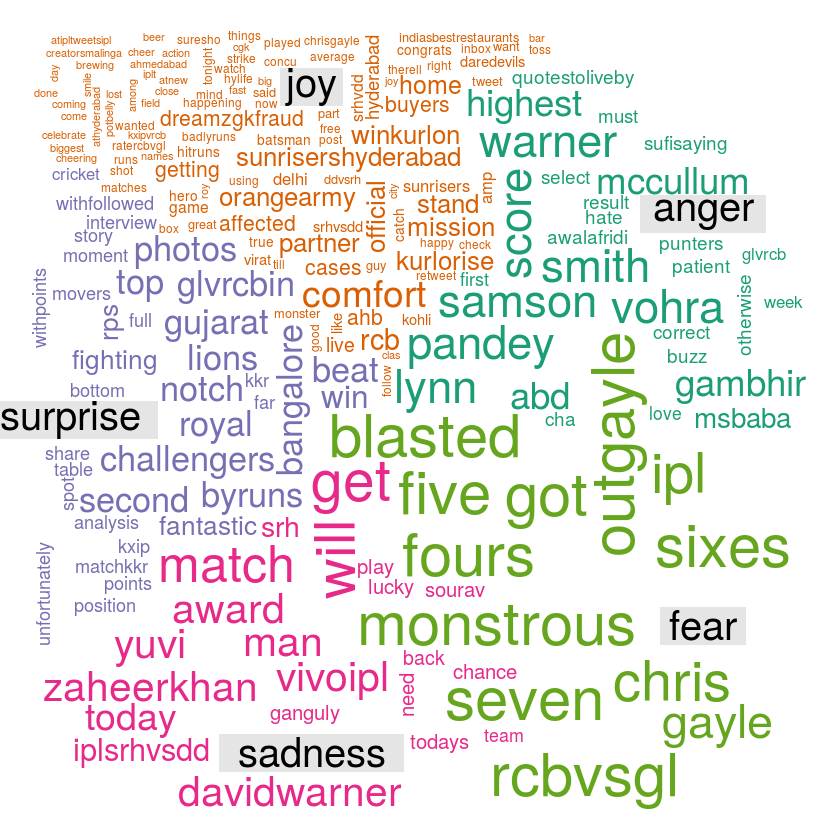

In [122]:
emos1 <- levels(factor(sent_df_v$emotion))
nemo1 <- length(emos1)
emo1.docs <- rep("",nemo1)
for (i in 1:nemo1){
    tmp = ipl_txt[emotion == emos1[i]]
    emo1.docs[i] = paste(tmp, collapse=" ")
}

#remove stopwords
emo1.docs <- removeWords(emo1.docs, stopwords("english"))
#create corpus
corpus1 <- Corpus(VectorSource(emo1.docs))
tdm1 <- TermDocumentMatrix(corpus1)
tdm1 <- as.matrix(tdm1)
colnames(tdm1) <- emos1

#Comparision word clouds
comparison.cloud(tdm1, colors = brewer.pal(nemo,"Dark2"),
                 scale = c(3,.5), random.order = FALSE, title.size=2)

Here we can see a lot of words in both models are put in incorrect categories and should be corrected.